# **Project 6 - Social Media Sentiment Analyzer**

In [4]:
import sys, tweepy, csv, re
from textblob import TextBlob
import matplotlib.pyplot as plt

Enter Keyword/Tag to search about : farmer protests

Enter how many tweets to search   : 1000
 
How people are reacting on farmer protests by analyzing 1000 tweets.

General Report: 
	 Weakly Positive

Detailed Report: 
	6.20% people thought it was positive
	29.30% people thought it was weakly positive
	1.60% people thought it was strongly positive
	4.50% people thought it was negative
	18.90% people thought it was weakly negative
	0.70% people thought it was strongly negative
	38.70% people thought it was neutral


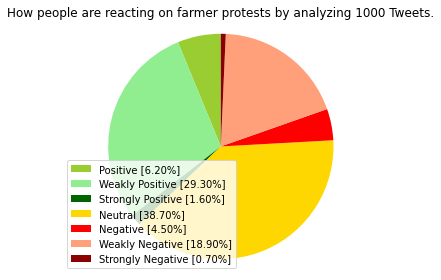

In [8]:
class SentimentAnalysis:
    
    def __init__(self):
        self.tweets    = []
        self.tweetText = []
        self.count     = 0   # to store the exact no. of analysis done 
        
    # function to clean the tweet texts  
    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())
    
    # function to calculate percentage per reaction
    def percentage(self, part, whole):
        percent = 100 * float(part) / float(whole)
        return format(percent, '.2f')
    
    def DownloadData(self):
        # authentication for accessing the twitter data
        consumerKey       = 'CONFIDENTIAL-KEY'
        consumerSecret    = "CONFIDENTIAL-KEY"
        accessToken       = "CONFIDENTIAL-KEY"
        accessTokenSecret = "CONFIDENTIAL-KEY"
        
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)
        
        # create a file to append data in csv format
        csvFile = open('Tweet_texts.csv', 'a')
        # Use csv writer to make a pointer for editing file
        csvWriter = csv.writer(csvFile)
        
        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about : ")
        NoOfTerms = int(input("\nEnter how many tweets to search   : "))
        
        # searching for tweets excluding retweets and getting extended full texted tweet
        self.tweets = tweepy.Cursor(api.search, q=searchTerm+' -filter:retweets', 
                                    lang = "en", tweet_mode='extended').items(NoOfTerms)
        # creating some variables to record the count of positive or negative sentiments according to the range of polarity
        polarity  = 0
        positive  = 0
        wpositive = 0
        spositive = 0
        negative  = 0
        wnegative = 0
        snegative = 0
        neutral   = 0
        
        # iterating through tweets fetched
        for tweet in self.tweets:
            cleanTweet = self.cleanTweet(tweet.full_text) # getting clean text using the function
            self.tweetText.append(cleanTweet)             # storing in a list to be appended into the csv file
            analysis  = TextBlob(cleanTweet)              # analyzing the clean tweet text
            pval      = analysis.sentiment.polarity
            polarity += pval                         # summing up all the polarity values to get average later
            self.count += 1                          # count after every successful analysis, total to be used later for calculating percentage per reaction
            print(self.count, end='\r')
            
            # adding reaction of how people are reacting to find average later
            if (pval == 0):
                neutral += 1
            elif (pval > 0 and pval <= 0.3):
                wpositive += 1
            elif (pval > 0.3 and pval <= 0.6):
                positive += 1
            elif (pval > 0.6 and pval <= 1):
                spositive += 1
            elif (pval > -0.3 and pval <= 0):
                wnegative += 1
            elif (pval > -0.6 and pval <= -0.3):
                negative += 1
            elif (pval > -1 and pval <= -0.6):
                snegative += 1
                
        # Write to csv and closing the file
        csvWriter.writerow(self.tweetText)
        csvFile.close()
        
        # finding average of how people are reacting
        positive  = self.percentage(positive,  self.count)
        wpositive = self.percentage(wpositive, self.count)
        spositive = self.percentage(spositive, self.count)
        negative  = self.percentage(negative,  self.count)
        wnegative = self.percentage(wnegative, self.count)
        snegative = self.percentage(snegative, self.count)
        neutral   = self.percentage(neutral,   self.count)
        
        # finding average reaction
        polarity = polarity / self.count
        
        # printing out data
        if(NoOfTerms == self.count):
            # "\033[A" to erase the prvious line in console
            print("\033[A \nHow people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        else:
            print("\nHow people are reacting on " + searchTerm + " by analyzing " + str(self.count) + " tweets.")
        print("\nGeneral Report: ")
        
        if (polarity == 0):
            print("\t Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("\t Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("\t Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("\t Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("\t Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("\t Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("\t Strongly Negative")
        
        # printing out the percentage calculated earlier
        print("\nDetailed Report: ")
        print("\t" + str(positive)  + "% people thought it was positive")
        print("\t" + str(wpositive) + "% people thought it was weakly positive")
        print("\t" + str(spositive) + "% people thought it was strongly positive")
        print("\t" + str(negative)  + "% people thought it was negative")
        print("\t" + str(wnegative) + "% people thought it was weakly negative")
        print("\t" + str(snegative) + "% people thought it was strongly negative")
        print("\t" + str(neutral)   + "% people thought it was neutral")
        
        # display the pie chart
        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
        
    # function for plotting pie chart  
    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 
                  'Weakly Positive [' + str(wpositive) + '%]',
                  'Strongly Positive [' + str(spositive) + '%]', 
                  'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 
                  'Weakly Negative [' + str(wnegative) + '%]', 
                  'Strongly Negative [' + str(snegative) + '%]'
                 ]
        sizes  = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

        
# Main
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()